In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
defcon_df = pd.read_csv("https://raw.githubusercontent.com/santhoshbvsrk/DeepLearning/main/DEFCON/defcon_level.csv")
defcon_df.head(10)

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054
5,6,1,0.10,2,4.0,11.0,0.508811,387.96,1,880000.0,2,10947
6,7,1,0.08,2,42.0,52.0,0.357562,349.80,1,1038400.0,4,4717
7,8,1,0.10,2,34.0,45.0,0.378120,348.74,1,1038400.0,4,8008
8,10,0,0.65,7,18.0,39.0,0.656388,333.90,1,959200.0,2,8179
9,8,0,0.29,3,18.0,58.0,0.618943,349.80,1,800800.0,2,6324


In [3]:
defcon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                10000 non-null  int64  
 1   Diplomatic_Meetings_Set       10000 non-null  int64  
 2   Percent_Of_Forces_Mobilized   10000 non-null  float64
 3   Hostile_Nations               10000 non-null  int64  
 4   Active_Threats                10000 non-null  float64
 5   Inactive_Threats              10000 non-null  float64
 6   Citizen_Fear_Index            10000 non-null  float64
 7   Closest_Threat_Distance(km)   10000 non-null  float64
 8   Aircraft_Carriers_Responding  10000 non-null  int64  
 9   Troops_Mobilized(thousands)   10000 non-null  float64
 10  DEFCON_Level                  10000 non-null  int64  
 11  ID                            10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


This shows that there are no missing values in the dataset

In [4]:
defcon_df.describe()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,8.317800,0.524100,0.270548,2.50230,15.754300,46.534600,0.486639,350.885758,0.891300,9.174874e+05,2.616600,6266.554200
std,1.748802,0.500244,0.196434,1.31178,10.388906,34.012649,0.134552,16.285744,0.329082,9.271764e+04,0.802788,3610.170288
min,5.000000,0.000000,0.000000,1.00000,1.000000,6.000000,0.000000,290.440000,0.000000,7.392000e+05,1.000000,2.000000
25%,7.000000,0.000000,0.090000,2.00000,7.000000,21.000000,0.406021,340.260000,1.000000,8.360000e+05,2.000000,3139.750000
50%,8.000000,1.000000,0.260000,2.00000,13.000000,37.000000,0.486784,350.860000,1.000000,8.976000e+05,3.000000,6280.500000
75%,9.000000,1.000000,0.430000,3.00000,21.000000,62.000000,0.567548,360.400000,1.000000,9.768000e+05,3.000000,9391.500000
max,16.000000,2.000000,1.000000,16.00000,72.000000,289.000000,1.000000,425.060000,2.000000,1.311200e+06,5.000000,12500.000000


*   Mean is 8+ and Max is 16 for Allied_Nations which means the values are almost evenly distributed.

*   Minimum value is 0 for Diplomatic_Meetings_set, Perecent_Of_Forces_Mobilized, Citizen_Fear_Index & Aircraft_Carriers_Responding which means that there are entries where no diplomatic meetings were set, no forces mobilized, no fear for citizens & no aircraft carriers responded.

*   The DEFCON_level doesn't have value 4 at any of the quantiles which means that 4 is either not present at all or used rarely.

*   Diplomatic_Meetings_Set has value 1 at 50 & 75% which means that for close to 50% of the records the number of meetings held were 1.

*   Percent_Of_Forces_Mobilized has value of 0.43 @75% interval which means most of the time not even half of the forces were mobilized & rarely all the forces are mobilized as max value is 1.

*   Hostlie_Nations in most of the records are <=3 as that's the value present in 3 quantiles. Also, there are rare entries where the count is 16 as shows the max value.

*   Active_Threats are atleast 1 and max 72. Similarly min Inactive_Threats are 6 and max 289.

*   In most of the cases the closest threat was between 340-360kms as that occupies 25-75% quantiles data.

*   In most of the cases aircrafts responded is 1 as that occupies 25-75% quantiles data.








In [5]:
defcon_df.isnull().sum()

Allied_Nations                  0
Diplomatic_Meetings_Set         0
Percent_Of_Forces_Mobilized     0
Hostile_Nations                 0
Active_Threats                  0
Inactive_Threats                0
Citizen_Fear_Index              0
Closest_Threat_Distance(km)     0
Aircraft_Carriers_Responding    0
Troops_Mobilized(thousands)     0
DEFCON_Level                    0
ID                              0
dtype: int64

* No missing values in data

In [6]:
defcon_df.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


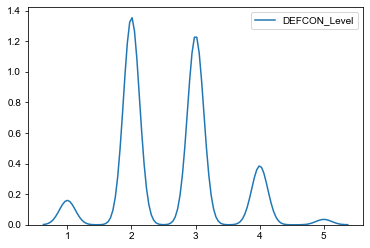

In [7]:
sns.kdeplot(defcon_df.DEFCON_Level)
sns.set(rc={'figure.figsize':(30,30)})
plt.show()

In [8]:
defcon_df.corr()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
Allied_Nations,1.000000,-0.278779,0.650308,0.111896,-0.113609,-0.067496,0.647604,-0.668521,0.096352,-0.110071,0.060440,0.003590
Diplomatic_Meetings_Set,-0.278779,1.000000,-0.576116,-0.036662,0.019046,0.089007,-0.030756,0.241155,-0.106499,-0.201561,-0.274835,0.014537
Percent_Of_Forces_Mobilized,0.650308,-0.576116,1.000000,0.149317,-0.036675,0.054474,0.357324,-0.529314,0.166989,0.085870,0.184876,-0.005668
Hostile_Nations,0.111896,-0.036662,0.149317,1.000000,0.146773,0.220252,0.299244,-0.081724,-0.004865,0.025103,-0.008469,-0.007541
Active_Threats,-0.113609,0.019046,-0.036675,0.146773,1.000000,0.674970,-0.009510,0.034700,-0.023317,-0.084188,-0.044782,0.006807
Inactive_Threats,-0.067496,0.089007,0.054474,0.220252,0.674970,1.000000,0.103296,-0.084670,-0.004199,-0.227941,-0.161675,-0.000820
Citizen_Fear_Index,0.647604,-0.030756,0.357324,0.299244,-0.009510,0.103296,1.000000,-0.336929,0.085540,-0.495305,-0.190940,0.000119
Closest_Threat_Distance(km),-0.668521,0.241155,-0.529314,-0.081724,0.034700,-0.084670,-0.336929,1.000000,-0.008636,0.177008,-0.030033,0.010935
Aircraft_Carriers_Responding,0.096352,-0.106499,0.166989,-0.004865,-0.023317,-0.004199,0.085540,-0.008636,1.000000,0.073819,0.125775,0.001647
Troops_Mobilized(thousands),-0.110071,-0.201561,0.085870,0.025103,-0.084188,-0.227941,-0.495305,0.177008,0.073819,1.000000,0.450504,0.002800


* Allied_Nations is correlated with Percent_Of_Forces_Mobilized, Citizen_Fear_Index, Closest_Threat_Distance(km).
* Diplotmatic_Meetings_Set is correlated with Percent_Of_Forces_Mobilized.
* Percent_Of_Forces_Mobilized is correlated with Allied_Nations, Diplomatic_Meetings_Set, Closest_Threat_Distance(km).
* Active_Threats is correlated with Inactive_Threats and viceversa.

In [12]:
!pip install dtale

In [13]:
import dtale
dt=dtale.show(defcon_df)
dt

2021-05-17 20:10:44,986 - INFO     - NumExpr defaulting to 4 threads.


In [45]:
X=defcon_df.drop(['DEFCON_Level','ID'],axis=1)
y=defcon_df.DEFCON_Level

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training Features shape is:',X_train.shape)
print('Training Target Variable shape is:',y_train.shape)
print('Testing Features shape is:',X_test.shape)
print('Training Target Variable shape is:',y_test.shape)

Training Features shape is: (8000, 11)
Training Target Variable shape is: (8000,)
Testing Features shape is: (2000, 11)
Training Target Variable shape is: (2000,)


In [11]:
X_train1,y_train1,X_val, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=50)

print('Training Features shape is:',X_train1.shape)
print('Training Target Variable shape is:',y_train1.shape)
print('Validation Features shape is:',X_val.shape)
print('Validation Target Variable shape is:',y_val.shape)

Training Features shape is: (6400, 11)
Training Target Variable shape is: (1600, 11)
Validation Features shape is: (6400,)
Validation Target Variable shape is: (1600,)


In [32]:
#import tensorflow model and layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [51]:
def base_model():
    
    model_es = Sequential()
    
    model_es.add(Dense(10,input_dim=10,kernel_initializer='normal',activation='relu'))
    model_es.add(Dense(1,kernel_initializer='normal'))

    model_es.compile(optimizer='adam', loss='mean_squared_error')

    return model_es

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
estimator = KerasRegressor(build_fn=base_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("**********************")
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))